<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_3_SRAL_coverage.ipynb"><< Determining SRAL product coverage</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_5_SRAL_waveforms.ipynb">SRAL waveforms >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-sral/HEAD?urlpath=%2Ftree%2F1_SRAL_introductory%2F1_4_SRAL_tracks.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-sral/1_SRAL_introductory/1_4_SRAL_tracks.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>    
</html>

<div class="alert alert-block alert-success">
<h3>Learn SRAL: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_SRAL_data_access_Data_Store.ipynb" target="_blank">1_1a_SRAL_data_access_Data_Store.ipynb</a>** if using the Data Store for data access
    <br><br>**OR**<br><br>
  - **<a href="./1_1b_SRAL_data_access_HDA.ipynb" target="_blank">1_1b_SRAL_data_access_HDA.ipynb</a>** if using WEkEO for data access
    
</div>
<hr>

# 1.3 SRAL tracks

### Data used

| Product Description  | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-3 SRAL level-2 | EO:EUM:DAT:0415 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SR_2_WAT___NTC?query=SRAL&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SR_2_WAT___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_2_WAT___" target="_blank">link</a>|

### Learning outcomes

At the end of this notebook you will know;
* What along-track altimetry data from Sentinel-3 looks like in a spatial sense.
* About range data - a fundamental altimetry measurement from which geophysical products are derived.
* Which flags exist in the Sentinel-3 altimetry level-2 products, and how these can be applied.
* How to plot the level-2 geophysical variables available from Sentinel-3 altimetry level-2 products.

### Outline

At level-1 and 2, altimetry data is fundamentally different to many other types of remote sensing data. Altimeters make measurements 'along-track', providing a single, narrow strip of data, compared to the 'image' type formats of many rows of pixels that users of optical data maybe more familiar with.  

Satellite altimetry missions determine the height of the Earth’s surface directly beneath the altimeter, by accurate measurement of range between the two. This is typically achieved by measuring the time it takes for a radar pulse, released by a satellite-based altimeter, to travel to a surface, reflect, and return to be recorded by an on-board detector. Unlike the passive SST and ocean colour sensors, altimetry is an active technique, as it requires the emission of a signal from the instrument itself. 

This notebook, and those that follow will explore how information about the sea surface can be derived from the range and other facets of the altimetry waveform.

Within the EUMETSAT user support knowledge base you can find out more information about the <a href='https://eumetsatspace.atlassian.net/wiki/spaces/SEN3/pages/1756168193/S3+altimetry+mission+processing+levels' target='_blank'>Sentinel-3 altimetry processing levels </a> and <a href='https://eumetsatspace.atlassian.net/wiki/spaces/SEN3/pages/1597767966/S3+altimetry+mission+products+file+types' target='_blank'> corresponding products </a>

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Investigating SRAL tracks](#section1)
 2. [Plotting SRAL level-2 range data](#section2)
 3. [Checking SRAL level-2 flags](#section3)
 4. [Plotting SRAL level-2 geophysical variables](#section4)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports
import cartopy                       # a library that support mapping
import cmocean                       # a library of nice colour palettes
import matplotlib.pyplot as plt      # a library that support plotting
import xarray as xr                  # a library that supports using labelled, multidimensional arrays
import numpy as np                   # a library that provides support for array-based mathematics
import os                            # a library that allows us access to basic operating system commands
import warnings                      # a library that helps us manage warnings
warnings.filterwarnings('ignore')

Lets set a few plot parameters for use throughout this notebook

In [2]:
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Reading SRAL level-2 data
[Back to top](#TOC-TOP)

</div>

First, let's open a Sentinel-3 altimetry level-2 product. As with the optical instruments (OLCI and SLSTR), data from the altimetry mission (centred around the SRAL altimeter) is provided in SAFE format. Within the SAFE folder for these data sets you find several netcdf (.nc) files, these include:

* Reduced: Low resolution (1 Hz) measurements, with corrections and flags.

* Standard: Low (1 Hz) and high (20 Hz) resolution measurements, with corrections and flags.

* Enhanced: As in standard mode, but also including the waveforms.

If you download the full SAFE file, as we have done in the **<a href="./1_1_SRAL_data_access_HDA_Data_Store.ipynb">Accessing SRAL data</a>**, you'll receive all these netcdf files, but you can also select to just download the particular resolution that suits your application. 

For this notebook, we'll open the standard measurements file...

In [3]:
# selecting SAFE directories
SAFE_directory = os.path.join(os.getcwd(), 'products', 
    'S3B_SR_2_WAT____20220218T110400_20220218T115102_20220316T035351_2822_062_365______MAR_O_NT_004.SEN3')
measurement_file = "standard_measurement.nc"

In [4]:
# read data
ds = xr.open_dataset(os.path.join(SAFE_directory, measurement_file))
ds.close()

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Plotting SRAL level-2 range data
[Back to top](#TOC-TOP)

</div>

As mentioned above, the range is a key parameter derived from altimetry measurements, representing the distance between the satellite and Earth's surface (in this case the ocean surface). In following notebooks you'll learn more about other parameters that can be derived from the range and other facets of the altimetry waveform, but let's take a look at what range measurements from the standard measurements file look like in a simple plot. We have a couple of choices to make here - the resolution of the product (1 Hz or 20 Hz) and whether we use products from the pseudo low rate mode (PLRM), or delay doppler/SAR (Ku) processing chains. The resolution (1 Hz or 20 Hz) influences how many measurement points we have along our track. The choice of processing mode (PLRM or SAR (Ku)) relates to whether you may wish to work with data more compatible with historical measurements (PLRM) or that takes advantage of the more modern measurement techniques available through SAR altimeters such as SRAL. You can find out more information about these two modes in the pages on the **<a href='https://eumetsatspace.atlassian.net/wiki/spaces/ALT/pages/1537343494/Altimetry+measurement+principles' target='_blank'>altimetry measurement</a>** and the **<a href='https://eumetsatspace.atlassian.net/wiki/spaces/SEN3/pages/1597768060/S3+altimetry+processing+level-2' target='_blank'> level-2 processing chains</a>** pages in the EUMETSAT user support knowledge base. In this case we will look at both the 1 Hz and 20 Hz data in the plots below, from the SAR (Ku) processing chain.

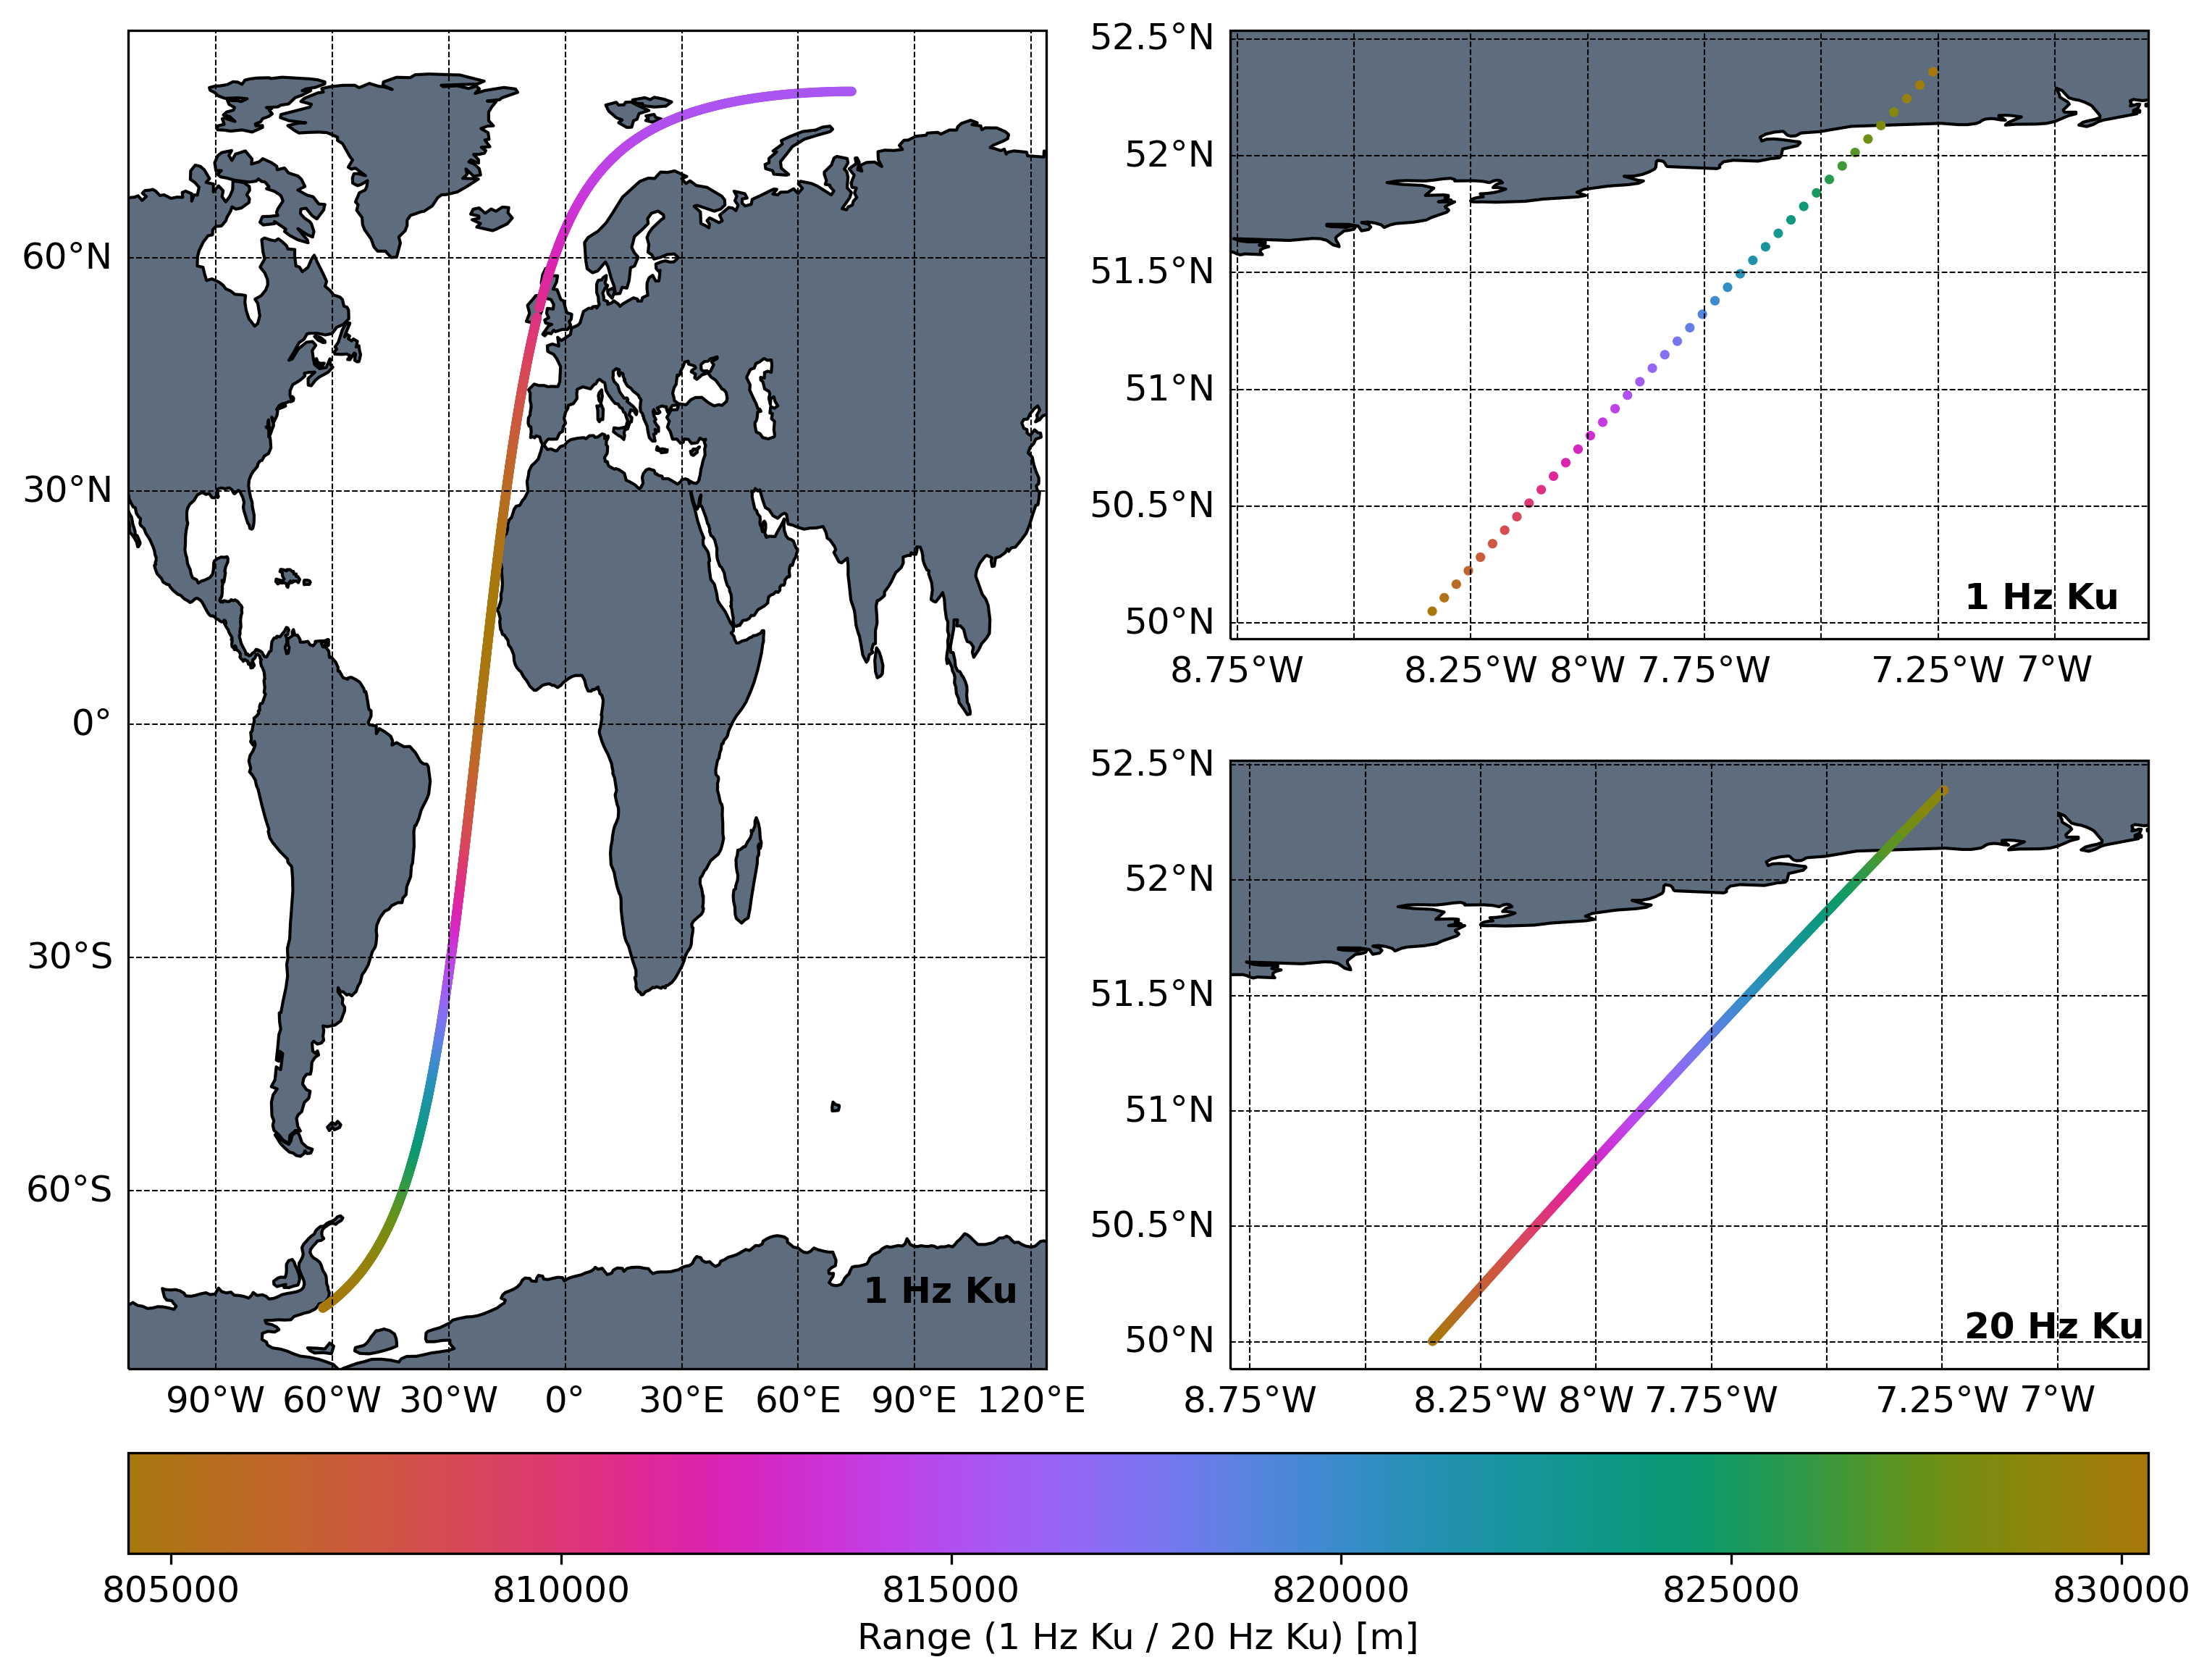

In [5]:
fig = plt.figure(figsize=(12, 10), dpi=300)
axs = [plt.subplot(121, projection=cartopy.crs.PlateCarree()),
       plt.subplot(222, projection=cartopy.crs.PlateCarree()),
       plt.subplot(224, projection=cartopy.crs.PlateCarree())]

lon_vars = [ds.lon_01, ds.lon_01, ds.lon_20_ku]
lat_vars = [ds.lat_01, ds.lat_01, ds.lat_20_ku]
plot_vars = [ds.range_ocean_01_ku, ds.range_ocean_01_ku, ds.range_ocean_20_ku]

for m, lon, lat, plot_var, annot in zip(axs, lon_vars, lat_vars, plot_vars, ['1 Hz Ku', '1 Hz Ku', '20 Hz Ku']):
    if m == axs[0]:
        f1 = m.scatter(lon, lat, c=plot_var, cmap=cmocean.cm.phase, 
                       s=10, marker='o', edgecolors=None, linewidth=0.0, zorder=1)
    else:
        ii = np.where((lat>50) & (lat<52.5))
        f2 = m.scatter(lon[ii], lat[ii], c=plot_var[ii], cmap=cmocean.cm.phase, 
                       s=10, marker='o', edgecolors=None, linewidth=0.0, zorder=1)
    
    m.annotate(annot, (0.8, 0.05), xycoords='axes fraction', color='k', fontweight='bold')
        
        
    m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
    g1 = m.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--', linewidth=0.5)
    g1.top_labels = False
    g1.right_labels = False
    g1.xlabel_style = {'color': 'black'}
    g1.ylabel_style = {'color': 'black'}
    m.set(facecolor = "1.0")
    if m == axs[0]:
        m.set_aspect(2)
        m.set_adjustable('datalim')
    else:
        m.set_aspect(0.5)
        m.set_adjustable('datalim')        

cbar = plt.colorbar(f1, ax=axs, orientation="horizontal", pad=0.05)
cbar.set_label('Range (1 Hz Ku / 20 Hz Ku) [m]')
plt.savefig('1_4_SRAL_tracks.png')
plt.show()

In the figure above, in the left hand panel, you can see a simple plot of the range measured along the entire track in the example file. This is a level-2 NTC file, and as such is distributed in half orbits as discussed in the previous notebook. In this panel, we have plotted the lower resolution 1 Hz data, from the SAR mode (Ku) processing chain. For a global scale plot such as this, the 1 Hz resolution is more than suitable to capture the variability in the range. Looking at the two figures in the right hand panel, you can see the different in the resolution more clearly when we zoom in on a subset of the data. Now, with the range here you can see that you don't really need the additional resolution as there's not much variability apparent/the data is very smooth across the track. Its important to remember that we are not deriving a geophysical variable (such as those relating to sea level, waves or wind) at this point - we'll look at that in the following notebooks. When we get to that stage, the choice of resolution can become more important. 

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Checking SRAL level-2 flags
[Back to top](#TOC-TOP)

</div>

A very important aspect of processing and/or working with any remote sensing product - is understanding if there are any issues, errors, uncertainties etc associated with the data. To support this, data is quality flagged from the earliest levels. In the altimetry data products from Sentinel-3, many flags are available to assess the quality of the measurements and the geophysical products derived from them. You can usually get a good idea from the flag names, as to which products they are relevant for. EUMETSAT also provides guidance on which flags should be used for different products (as well as in which circumstances users may want to consider using flags or not). Within the EUMETSAT user support knowledge base, is a specific page on the **<a href='https://eumetsatspace.atlassian.net/wiki/spaces/SEN3/pages/1748697091/Altimetry+level-2+flags' target='_blank'> flags applicable to the Sentinel-3 level-2 altimetry products</a>** page.

In the first cell of code below, we'll retrieve the relevant flags for the range from the example data product we opened initially. We'll also retrieve some of the flags for the geophysical products, just to see how these compare. For each flag, we'll create two masks: one where the flag is raised that we set to an arbitrary value so that we can visualise them all over the track; the second mask we will set all locations where the flag isn't raised, to NaN so these don't appear in our plot. You could also do this vice versa, so that you can overlay a mask of NaNs where the flag is raised, over the data, to exclude those values.

In [6]:
# get the relevant flags
flags_range = np.array(ds.range_ocean_qual_01_ku).astype(float)
flags_range[flags_range != 0.0] = 1.1
flags_range[flags_range == 0.0] = np.nan

flags_swh = np.array(ds.swh_ocean_qual_01_ku).astype(float)
flags_swh[flags_swh != 0.0] = 1.15
flags_swh[flags_swh == 0.0] = np.nan

flags_ws = np.array(ds.sig0_ocean_qual_01_ku).astype(float)
flags_ws[flags_ws != 0.0] = 1.2
flags_ws[flags_ws == 0.0] = np.nan

flags_ssha = np.array(ds.range_ocean_qual_01_ku).astype(float) \
           + np.array(ds.surf_class_01).astype(float) \
           + np.array(ds.rad_surf_type_01).astype(float)
flags_ssha[flags_ssha != 0.0] = 1.25
flags_ssha[flags_ssha == 0.0] = np.nan

In [7]:
# normalise the range to help with plotting
norm_range = ds.range_ocean_01_ku
norm_range = (norm_range - np.nanmin(norm_range)) / (np.nanmax(norm_range) - np.nanmin(norm_range))

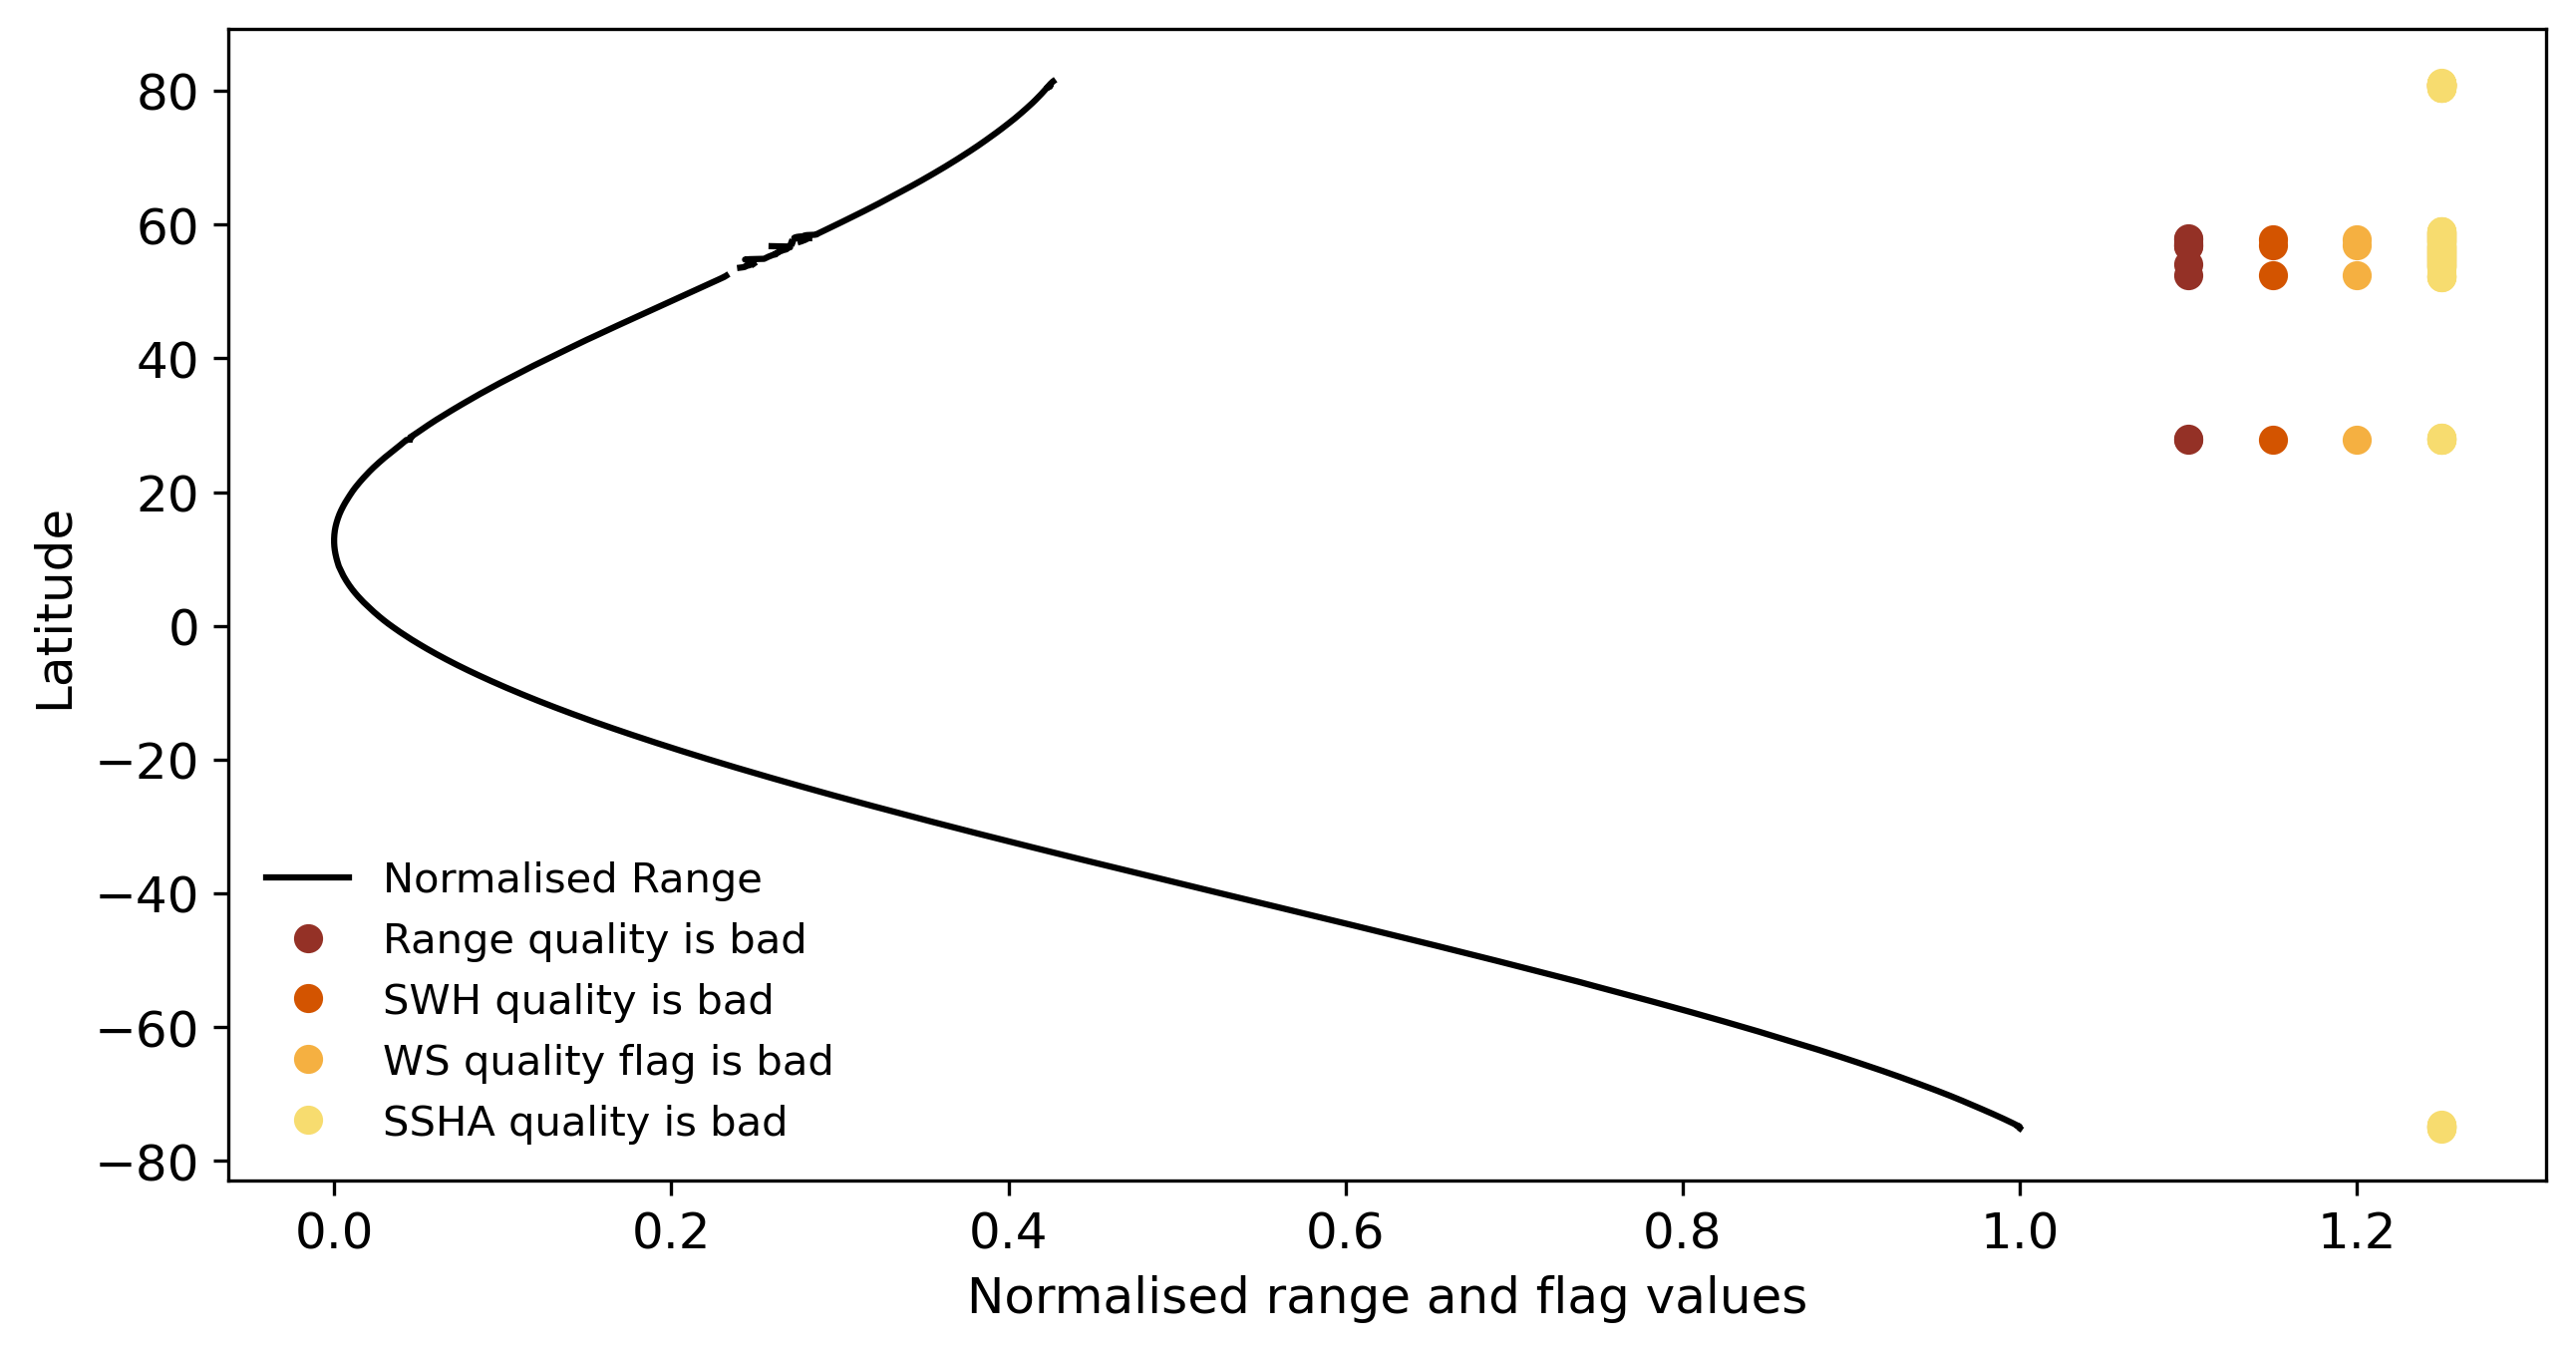

In [8]:
# plot the flags and normalised range
fig, axs = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
p1, = axs.plot(norm_range, ds.lat_01, 'k', label='Normalised Range')
p2, = axs.plot(flags_range, ds.lat_01, '#943126', marker='o', linewidth=0.0, label='Range quality is bad')
p3, = axs.plot(flags_swh, ds.lat_01, '#D35400', marker='o', linewidth=0.0, label='SWH quality is bad')
p4, = axs.plot(flags_ws, ds.lat_01, '#F5B041', marker='o', linewidth=0.0, label='WS quality flag is bad')
p5, = axs.plot(flags_ssha, ds.lat_01, '#F7DC6F', marker='o', linewidth=0.0, label='SSHA quality is bad')
plt.xlabel('Normalised range and flag values')
plt.ylabel('Latitude')

handles, labels = axs.get_legend_handles_labels()
plt.legend(handles, labels, loc='lower left', fontsize=10, frameon=False)
plt.show()

In the plot above you can see the range (normalised for ease of plotting), and the locations along the track (in terms of latitude) where the flags we selected are raised. You can see that where the range quality is bad, this influences the geophysical products, which also have their respective flags raised. However, other factors can also influence the validity of the processing of the geophysical products. For example, you can see there is another instance in the lower latitudes where the quality of the sea surface height anomaly (SSHA). In the following notebooks you can learn more about these geophysical variables.

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_3_SRAL_coverage.ipynb"><< Determining SRAL product coverage</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_5_SRAL_waveforms.ipynb">SRAL waveforms >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>